# Spherical hole problem

The spherial hole problem is considered in 24.1.2 in

[1] J.R. Barber, Elasticity, 2002, 2nd ed.

The domain defined as
$$
    \Omega = \{ x \in \mathbb{R^3} : 0 < a < |x| < A\}
$$
Let
$$
    \Gamma^r = \{ x \in \mathbb{R^3} : |x| = r\},
$$
then $\partial\Omega = \Gamma^a \cup \Gamma^A$.

Spherical coordinates are given by

$$
\begin{aligned}
    x &= R \cos(\theta) \sin(\beta), \\
    y &= R \sin(\theta) \sin(\beta), \\
    z &= R \cos(\beta),
\end{aligned}
$$
where $\theta \in [0,2\pi)$ and $\beta\in[0,\pi)$.

Sought is the solution to the problem
$$
\begin{aligned}
    \sigma_{RR} = 0, & \quad x \in \Gamma^a, \\
    \sigma_{R\theta} = 0, & \quad x \in \Gamma^a, \\
    \sigma_{R\beta} = 0, & \quad x \in \Gamma^a, \\
    u_r = g_r, & \quad x \in \Gamma^A, \\
    u_\theta = g_\theta, & \quad x \in \Gamma^A, \\
    u_\beta = g_\beta, & \quad x \in \Gamma^A,
\end{aligned}
$$
such that the equations of elasticity are satisfied.

Define necessary symbols

In [1]:
from sympy import *
from util import lua_code, lua_code_cse
init_printing()

In [2]:
R, t, b = symbols('R theta beta')
a, S, mu, nu = symbols('a S mu0 nu')

Solution ansatz [1]:

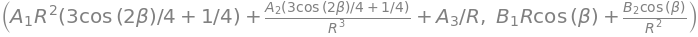

In [3]:
A1, A2, A3, B1, B2 = symbols('A_1 A_2 A_3 B_1 B_2')
P2 = (3*cos(2*b) + 1) / 4
P1 = cos(b)
P0 = 1
phi = A1*R**2*P2 + A2*R**(-3)*P2 + A3*R**(-1)*P0
w = B1*R*P1 + B2*R**(-2)*P1
(phi, w)

Compute stresses (Table 19.2, Solutions A and B [1]):

In [4]:
sRR = phi.diff(R,2) + R*cos(b)*w.diff(R, 2) - 2*(1-nu)*w.diff(R)*cos(b) + 2*nu/R * w.diff(b) * sin(b)
sRb = phi.diff(R).diff(b) / R - phi.diff(b) / R**2 + (1-2*nu)*w.diff(R)*sin(b) + cos(b)*w.diff(b).diff(R) - 2*(1-nu)*cos(b)/R * w.diff(b)

The solution is given by coefficients

In [5]:
sol = [(A1, S*nu / (1+nu)),
        (A2, S*a**5 / (7-5*nu)),
        (A3, S*a**3 * (6-5*nu) / (2*(7-5*nu))),
        (B1, -S / (2*(1+nu))),
        (B2, -5*S*a**3 / (2*(7-5*nu)))]

Check boundary condition on inner sphere.

In [6]:
(simplify(sRR.subs(sol).subs(R, a)),
 simplify(sRb.subs(sol).subs(R, a)))

Compute displacements (Table 19.2, Solutions A and B [1]):

In [7]:
uR = (phi.diff(R) + R*cos(b)*w.diff(R) - (3-4*nu)*w*cos(b))/(2*mu)
ub = (phi.diff(b) / R + cos(b)*w.diff(b) + (3-4*nu)*w*sin(b))/(2*mu)

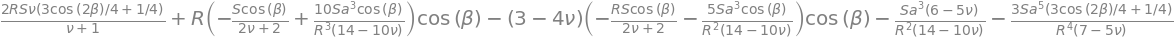

In [8]:
uR.subs(sol)*2*mu

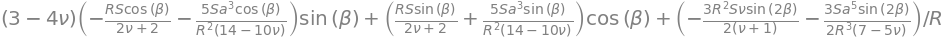

In [9]:
ub.subs(sol)*2*mu

We set $g_r=u_r, g_\theta = 0, g_\beta = u_\beta$ on the outer sphere boundary.

## Manual displacement simplification

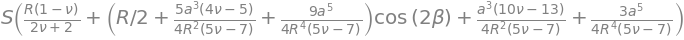

In [10]:
uR_manual = S/(2*mu)*((R*(1-nu))/(2*(1+nu)) + (a**3*(10*nu - 13))/(4*R**2*(5*nu-7)) \
            + (3*a**5)/(4*R**4*(5*nu-7)) \
            + cos(2*b)*(R/2 + (5*a**3*(4*nu-5))/(4*R**2*(5*nu-7)) + 9*a**5/(4*R**4*(5*nu-7))))
uR_manual*2*mu

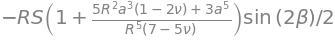

In [11]:
ub_manual = -R*S/(4*mu)*sin(2*b)*((5*R**2*a**3*(1 - 2*nu) + 3*a**5)/(R**5*(7-5*nu)) + 1)
ub_manual*2*mu

Check.

In [12]:
(simplify(uR.subs(sol) - uR_manual), simplify(ub.subs(sol) - ub_manual))

Generate Lua code:

In [13]:
lua_code_cse([('uR', simplify(uR_manual)), ('ub', simplify(ub_manual))])

local x0 = nu + 1
local x1 = a^5
local x2 = R^5
local x3 = 5*nu - 7
local x4 = x2*x3
local x5 = 10*nu
local x6 = R^2*a^3
local x7 = 2*beta
local x8 = S/(R^4*mu0*x3)
local uR = (1.0/8.0)*x8*(x0*x6*(x5 - 13) + x0*(9*x1 + x2*(x5 - 14) + x6*(20*nu - 25))*math.cos(x7) + x1*(3*nu + 3) + 2*x4*(1 - nu))/x0
local ub = -1.0/4.0*x8*(-3*x1 + x4 + x6*(x5 - 5))*math.sin(x7)


Compute Jacobian

In [14]:
J = {}
J['uR_R'] = simplify(uR_manual.diff(R))
J['uR_b'] = simplify(uR_manual.diff(b))
J['ub_R'] = simplify(ub_manual.diff(R))
J['ub_b'] = simplify(ub_manual.diff(b))
lua_code_cse(J.items())

local x0 = nu + 1
local x1 = a^5
local x2 = R^5
local x3 = 5*nu
local x4 = x3 - 7
local x5 = x2*x4
local x6 = 10*nu
local x7 = R^2*a^3
local x8 = 2*beta
local x9 = math.cos(x8)
local x10 = 20*nu
local x11 = x7*(x10 - 25)
local x12 = S/(mu0*x4)
local x13 = (1.0/4.0)*x12
local x14 = x13/x2
local x15 = R^(-4)
local x16 = math.sin(x8)
local uR_R = -x14*(x0*x7*(x6 - 13) + x0*x9*(18*x1 + x11 - x5) + x1*(6*nu + 6) + x5*(nu - 1))/x0
local uR_b = -x13*x15*x16*(9*x1 + x11 + x2*(x6 - 14))
local ub_R = x14*x16*(-12*x1 + x10*x7 - x2*x3 + 7*x2 - 10*x7)
local ub_b = -1.0/2.0*x12*x15*x9*(-3*x1 + x5 + x7*(x6 - 5))
